## Defining the libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_raw = pd.read_excel('datasetMOS.xlsx')
data_raw.head()

,ID,initial_max_DL_rate,E2E_RTT,average_playback_rate,initial_buffering_latency,stalling_ratio,VMOS,total_DL_rate,stalling_duration,playing_time,playing_total_duration,stalling_times,video_bitrate,initial_buffer_download_size
0,2373842,49450,54,3719,1108,0.0,3.96,3795,0,30013,30013,0,2934,1645944
1,2378429,50517,52,5902,1095,0.0,3.96,5859,0,30006,30006,0,2903,1555356
2,2379101,47988,47,5806,1051,0.0,3.98,5857,0,30006,30006,0,2903,1535444
3,2379387,56457,55,5978,1099,0.0,3.96,5989,0,30003,30003,0,2903,1534092
4,2379404,56690,54,5931,1133,0.0,3.95,5932,0,30005,30005,0,2934,1582192


In [3]:
#selecting required feature columns
selected_columns = ['average_playback_rate','total_DL_rate','video_bitrate',
                    'initial_max_DL_rate','E2E_RTT', 'initial_buffering_latency',
                    'initial_buffer_download_size', 'playing_time',
                    'playing_total_duration','stalling_times','stalling_ratio','stalling_duration','VMOS']
pre_data = data_raw[selected_columns].copy()
pre_data.head()

,average_playback_rate,total_DL_rate,video_bitrate,initial_max_DL_rate,E2E_RTT,initial_buffering_latency,initial_buffer_download_size,playing_time,playing_total_duration,stalling_times,stalling_ratio,stalling_duration,VMOS
0,3719,3795,2934,49450,54,1108,1645944,30013,30013,0,0.0,0,3.96
1,5902,5859,2903,50517,52,1095,1555356,30006,30006,0,0.0,0,3.96
2,5806,5857,2903,47988,47,1051,1535444,30006,30006,0,0.0,0,3.98
3,5978,5989,2903,56457,55,1099,1534092,30003,30003,0,0.0,0,3.96
4,5931,5932,2934,56690,54,1133,1582192,30005,30005,0,0.0,0,3.95


In [4]:
pre_data.corr()

,average_playback_rate,total_DL_rate,video_bitrate,initial_max_DL_rate,E2E_RTT,initial_buffering_latency,initial_buffer_download_size,playing_time,playing_total_duration,stalling_times,stalling_ratio,stalling_duration,VMOS
average_playback_rate,1.000000,0.972575,-0.000391,0.234235,-0.035605,-0.470547,0.164163,0.671376,-0.012906,-0.626788,-0.323911,-0.671504,0.622197
total_DL_rate,0.972575,1.000000,-0.016431,0.365289,-0.095209,-0.548708,0.213742,0.688203,0.017685,-0.648156,-0.330419,-0.688229,0.685881
video_bitrate,-0.000391,-0.016431,1.000000,-0.002466,-0.049684,-0.015830,0.219792,0.021950,0.001455,-0.028749,-0.021267,-0.021948,0.031457
initial_max_DL_rate,0.234235,0.365289,-0.002466,1.000000,-0.183266,-0.452615,0.431930,0.230768,0.038856,-0.250274,-0.099712,-0.230663,0.443372
E2E_RTT,-0.035605,-0.095209,-0.049684,-0.183266,1.000000,0.393574,-0.065980,-0.127944,-0.118208,0.128838,0.040903,0.127554,-0.335845
initial_buffering_latency,-0.470547,-0.548708,-0.015830,-0.452615,0.393574,1.000000,-0.158329,-0.674514,-0.064597,0.584441,0.276159,0.674376,-0.762826
initial_buffer_download_size,0.164163,0.213742,0.219792,0.431930,-0.065980,-0.158329,1.000000,0.215121,0.048146,-0.117524,-0.425759,-0.214983,0.224297
playing_time,0.671376,0.688203,0.021950,0.230768,-0.127944,-0.674514,0.215121,1.000000,0.038176,-0.873720,-0.543263,-0.999994,0.830716
playing_total_duration,-0.012906,0.017685,0.001455,0.038856,-0.118208,-0.064597,0.048146,0.038176,1.000000,-0.034508,-0.016877,-0.034742,0.061281
stalling_times,-0.626788,-0.648156,-0.028749,-0.250274,0.128838,0.584441,-0.117524,-0.873720,-0.034508,1.000000,0.292180,0.873710,-0.868423


## Plotting Correlation Heatmap

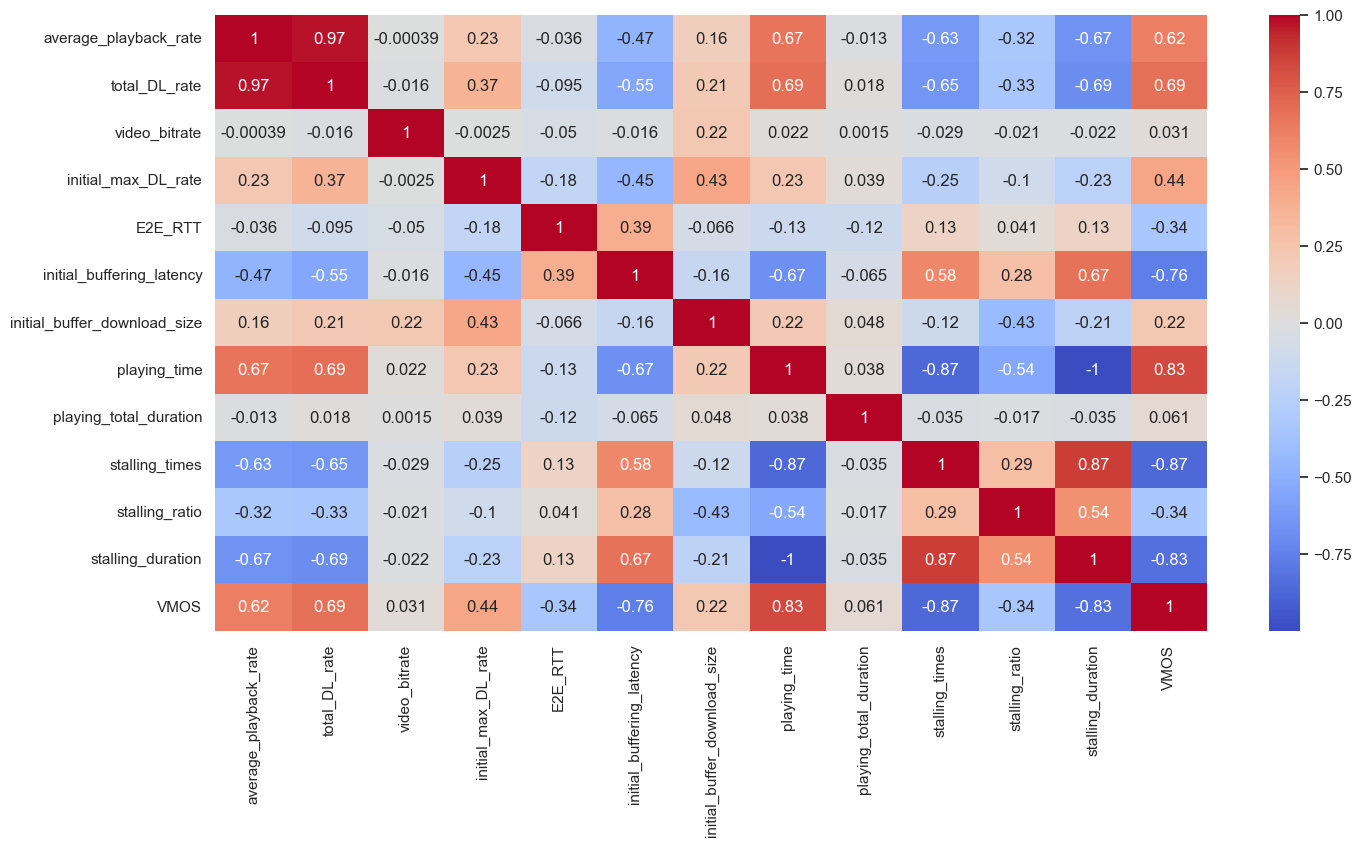

In [5]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(16,8)})
heatmap = sns.heatmap(pre_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Save the heatmap as an image file
heatmap.figure.savefig('2.png')

In [6]:
# selecting Columns that showed significant correlation with VMOS
pre_data = pre_data.drop(['video_bitrate','initial_buffer_download_size','playing_total_duration'], axis = 1)

## Outlier Detection using Visual Analysis:

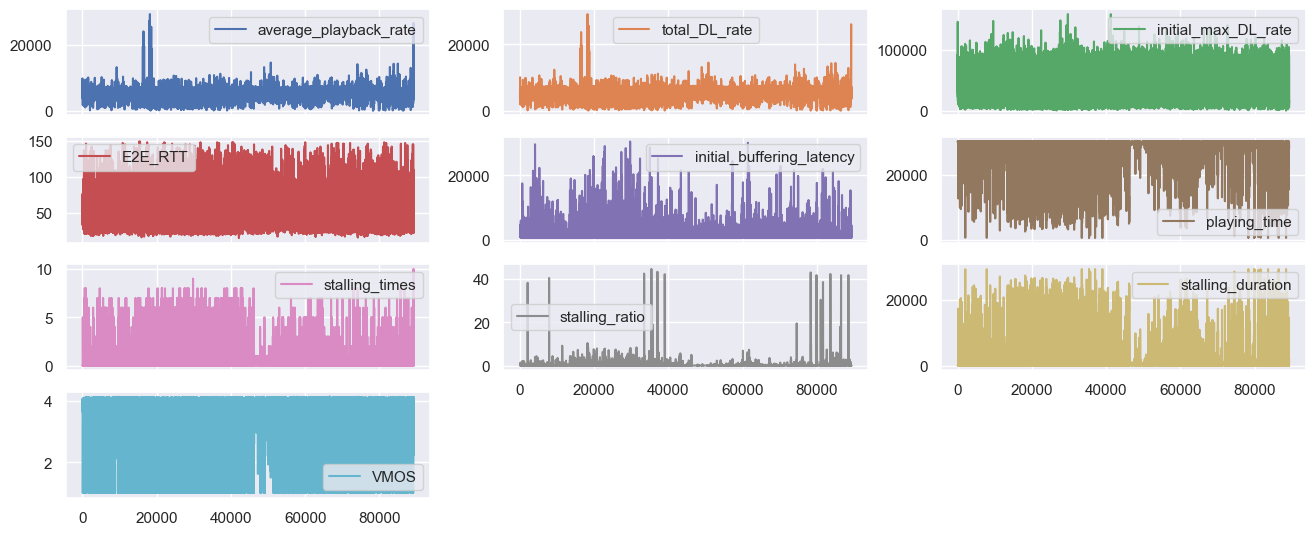

In [7]:
import matplotlib.pyplot as plt

# Plotting the feature column
pre_data.plot(subplots=True, layout=(5,3))
plt.savefig('plots.png')
plt.show()

## Outlier Detection using Z-Score Analysis:

In [8]:
outlier_counts = {}
for column in pre_data.columns:
    # Calculate the mean and standard deviation for the feature column
    mean = pre_data[column].mean()
    std = pre_data[column].std()
    
    # Calculate the z-score for each data point in the feature column
    z_scores = (pre_data[column] - mean) / std
    
    # Count the number of outliers based on the z-score threshold
    num_outliers = sum(abs(z_scores) > 3)
    
    # Store the number of outliers in the dictionary
    outlier_counts[column] = num_outliers

# Print the outlier counts for each feature
for column, count in outlier_counts.items():
    print(f"Feature '{column}' has {count} outliers = {(count/89266)*100} %")

Feature 'average_playback_rate' has 2531 outliers = 2.835346044406605 %
Feature 'total_DL_rate' has 2499 outliers = 2.7994981291869245 %
Feature 'initial_max_DL_rate' has 167 outliers = 0.18708130755270763 %
Feature 'E2E_RTT' has 1753 outliers = 1.9637936056281229 %
Feature 'initial_buffering_latency' has 1304 outliers = 1.4608025452019806 %
Feature 'playing_time' has 1844 outliers = 2.065736114534089 %
Feature 'stalling_times' has 2182 outliers = 2.4443797190419647 %
Feature 'stalling_ratio' has 432 outliers = 0.48394685546568683 %
Feature 'stalling_duration' has 1844 outliers = 2.065736114534089 %
Feature 'VMOS' has 2795 outliers = 3.131091344968969 %


## Outlier Detection using Inter-Quartile Range

In [9]:
for column in pre_data.columns:
    # Calculate the first quartile (Q1) and third quartile (Q3) of the feature column
    Q1 = pre_data[column].quantile(0.25)
    Q3 = pre_data[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers based on the lower and upper bounds 
    num_outliers = sum((pre_data[column] < lower_bound) | (pre_data[column] > upper_bound))
    
    # Store the number of outliers in the dictionary
    outlier_counts[column] = num_outliers

# Print the outlier counts for each feature
for column, count in outlier_counts.items():
    print(f"Feature '{column}' has {count} outliers = {(count/89266)*100} %")

Feature 'average_playback_rate' has 8714 outliers = 9.761835413259249 %
Feature 'total_DL_rate' has 7293 outliers = 8.16996392803531 %
Feature 'initial_max_DL_rate' has 296 outliers = 0.33159321578204465 %
Feature 'E2E_RTT' has 3278 outliers = 3.6721708153160217 %
Feature 'initial_buffering_latency' has 5960 outliers = 6.676674209665494 %
Feature 'playing_time' has 12493 outliers = 13.995250151233392 %
Feature 'stalling_times' has 4170 outliers = 4.671431452064616 %
Feature 'stalling_ratio' has 4070 outliers = 4.559406717003115 %
Feature 'stalling_duration' has 4158 outliers = 4.657988483857236 %
Feature 'VMOS' has 6461 outliers = 7.2379181323236175 %


## Removing outliers based on IQR:

In [10]:
data_processed_iqr = pre_data.copy()

column_name = 'initial_max_DL_rate'
Q1 = data_processed_iqr[column_name].quantile(0.25)
Q3 = data_processed_iqr[column_name].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.2* IQR
upper = Q3 + 1.2* IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data_processed_iqr[column_name]>=upper)[0]
lower_array = np.where(data_processed_iqr[column_name]<=lower)[0]
 
# Removing the outliers
data_processed_iqr.drop(index=upper_array, inplace=True)
data_processed_iqr.drop(index=lower_array, inplace=True)
data_processed_iqr = data_processed_iqr.reset_index(drop=True)
data_processed_iqr.head()

,average_playback_rate,total_DL_rate,initial_max_DL_rate,E2E_RTT,initial_buffering_latency,playing_time,stalling_times,stalling_ratio,stalling_duration,VMOS
0,3719,3795,49450,54,1108,30013,0,0.0,0,3.96
1,5902,5859,50517,52,1095,30006,0,0.0,0,3.96
2,5806,5857,47988,47,1051,30006,0,0.0,0,3.98
3,5978,5989,56457,55,1099,30003,0,0.0,0,3.96
4,5931,5932,56690,54,1133,30005,0,0.0,0,3.95


## Removing outliers based on Z-Score:

In [11]:
data_processed_zsc = pre_data.copy()

column = 'average_playback_rate'
mean = data_processed_zsc[column].mean()
std = data_processed_zsc[column].std()
z_scores = (data_processed_zsc[column] - mean) / std

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(z_scores > 3)[0]
 
    
# Removing the outliers
data_processed_zsc.drop(index=upper_array, inplace=True)
data_processed_zsc = data_processed_zsc.reset_index(drop=True)
data_processed_zsc.head()

,average_playback_rate,total_DL_rate,initial_max_DL_rate,E2E_RTT,initial_buffering_latency,playing_time,stalling_times,stalling_ratio,stalling_duration,VMOS
0,3719,3795,49450,54,1108,30013,0,0.0,0,3.96
1,5902,5859,50517,52,1095,30006,0,0.0,0,3.96
2,5806,5857,47988,47,1051,30006,0,0.0,0,3.98
3,5978,5989,56457,55,1099,30003,0,0.0,0,3.96
4,5931,5932,56690,54,1133,30005,0,0.0,0,3.95


<Axes: >

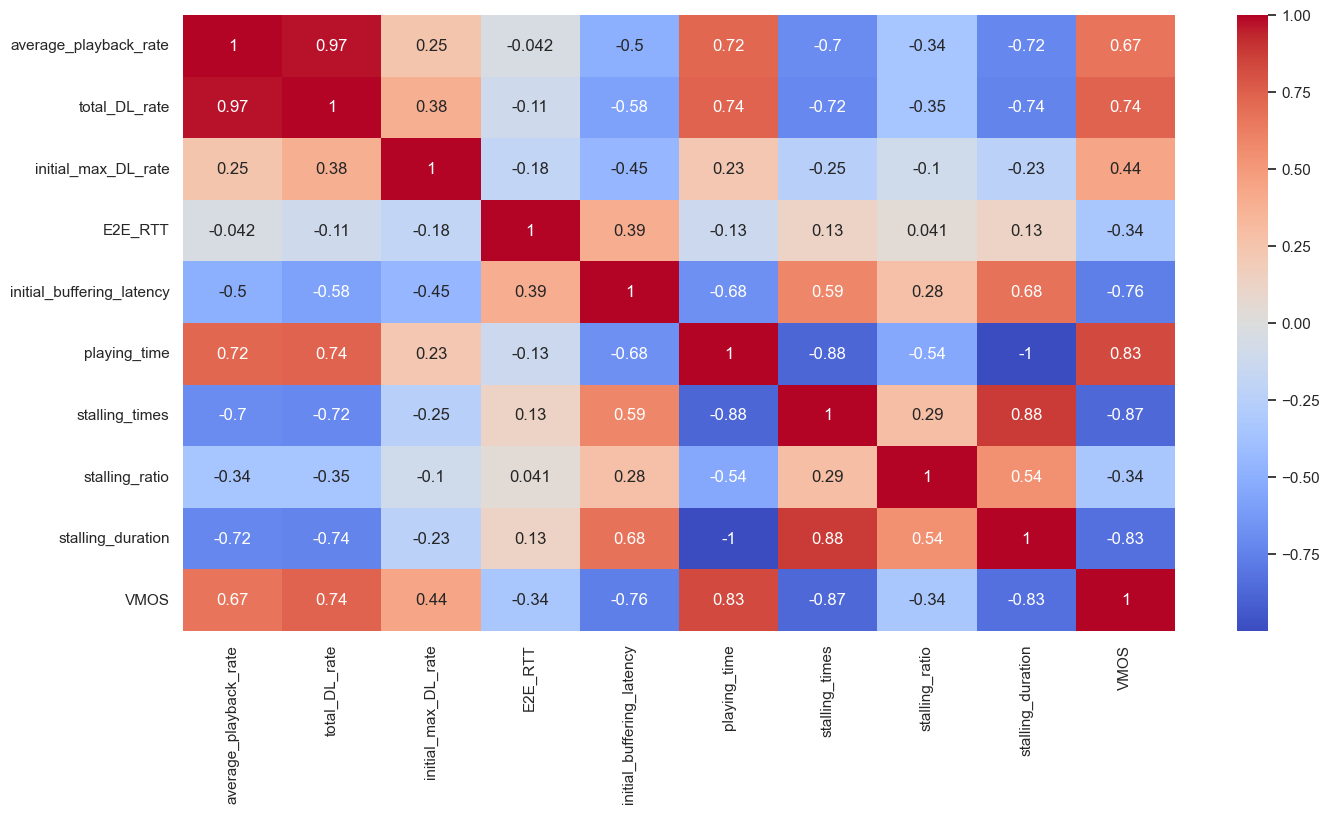

In [12]:
# Correlation Heatmap
import seaborn as sns

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data_processed_zsc.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

## Standardization of the resultant data

In [13]:
y = data_processed_zsc['VMOS'].values
data_processed_zsc = data_processed_zsc.drop(['VMOS'], axis = 1)
# Applying standardization
from sklearn.preprocessing import StandardScaler

numerical_scaled = StandardScaler().fit_transform(data_processed_zsc)
standardized_data = pd.DataFrame(numerical_scaled, columns=data_processed_zsc.columns)
standardized_data.head()

,average_playback_rate,total_DL_rate,initial_max_DL_rate,E2E_RTT,initial_buffering_latency,playing_time,stalling_times,stalling_ratio,stalling_duration
0,-2.379140,-2.439952,0.393113,0.134066,-0.227463,0.163446,-0.181605,-0.06493,-0.161553
1,0.169108,-0.053207,0.441260,0.041894,-0.237558,0.160652,-0.181605,-0.06493,-0.161553
2,0.057046,-0.055519,0.327141,-0.188538,-0.271727,0.160652,-0.181605,-0.06493,-0.161553
3,0.257824,0.097121,0.709298,0.180153,-0.234452,0.159455,-0.181605,-0.06493,-0.161553
4,0.202960,0.031208,0.719812,0.134066,-0.208049,0.160253,-0.181605,-0.06493,-0.161553


## Graphical Changes Introduced in Dataset after Standardization

In [14]:
mean_arr = []
std_arr = []
org_mean_arr = []
org_std_arr = []
for column in standardized_data.columns:
    #Standardized Data mean and standard devaition
    mean = standardized_data[column].mean()
    std = standardized_data[column].std()
    mean_arr.append(mean)
    std_arr.append(std)
    
    #Original Data mean and standard devaition
    mean = data_processed_zsc[column].mean()
    std = data_processed_zsc[column].std()
    org_mean_arr.append(mean)
    org_std_arr.append(std)

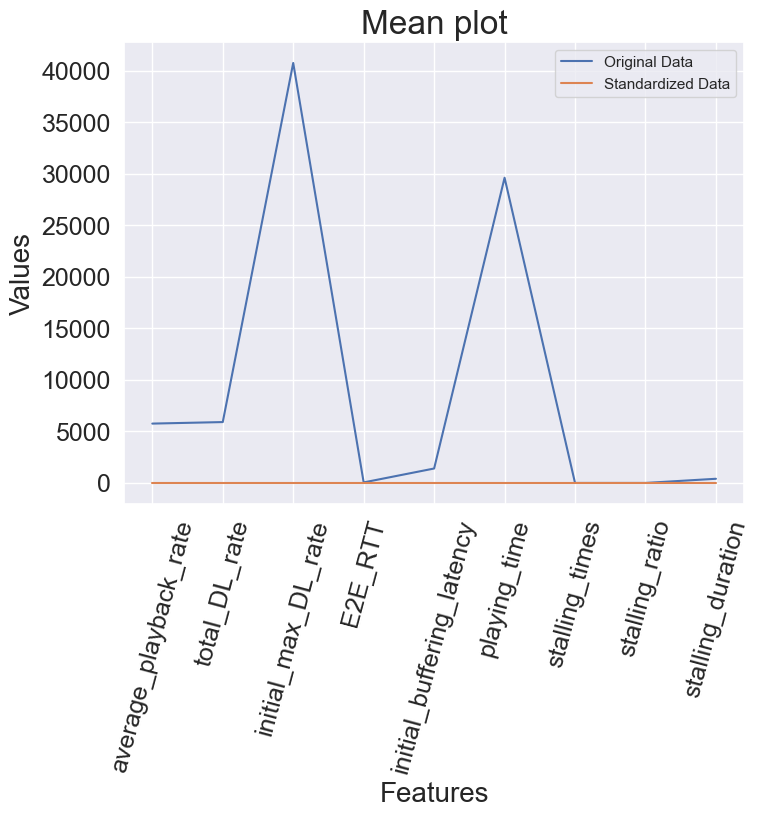

In [20]:
# Plot of Mean
x= np.array(standardized_data.columns.tolist())
plotdata = pd.DataFrame({
    "Original Data":org_mean_arr,
    "Standardized Data":mean_arr},
    index=x)

plotdata.plot(figsize=(8, 6))
plt.title("Mean plot", fontsize=24)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Values", fontsize=20)

# Increase font size of tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 75)
plt.savefig("5.1.png", bbox_inches='tight')
plt.show()

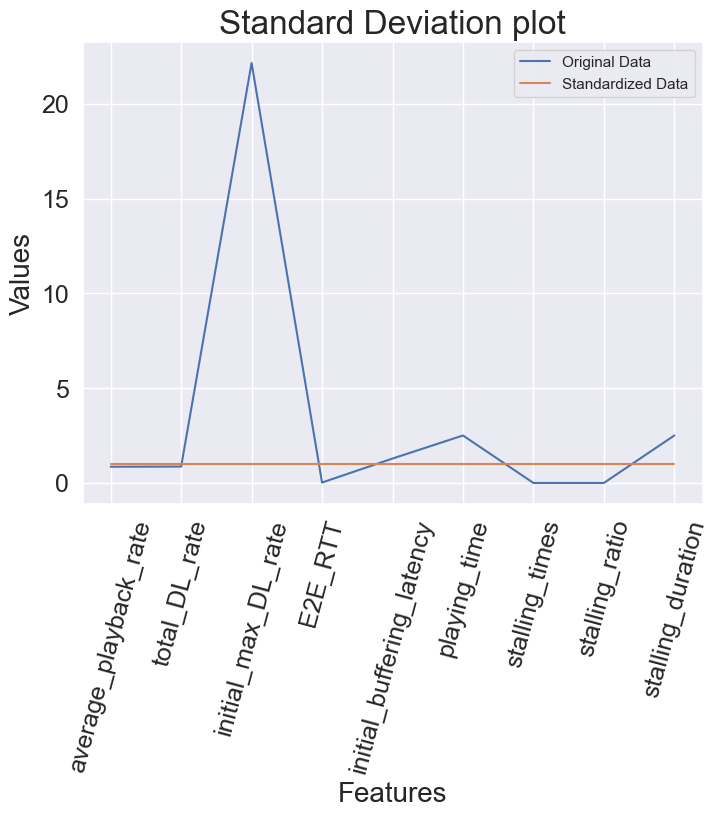

In [22]:
# Plot of Standard Deviation
org_std_arr = [x / 1000 for x in org_std_arr]
x= np.array(standardized_data.columns.tolist())

plotdata = pd.DataFrame({
    "Original Data":org_std_arr,
    "Standardized Data":std_arr},
    index=x)

plotdata.plot(figsize=(8, 6))
plt.title("Standard Deviation plot", fontsize=24)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Values", fontsize=20)

# Increase font size of tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 75)
plt.savefig("5.2.png", bbox_inches='tight')
plt.show()

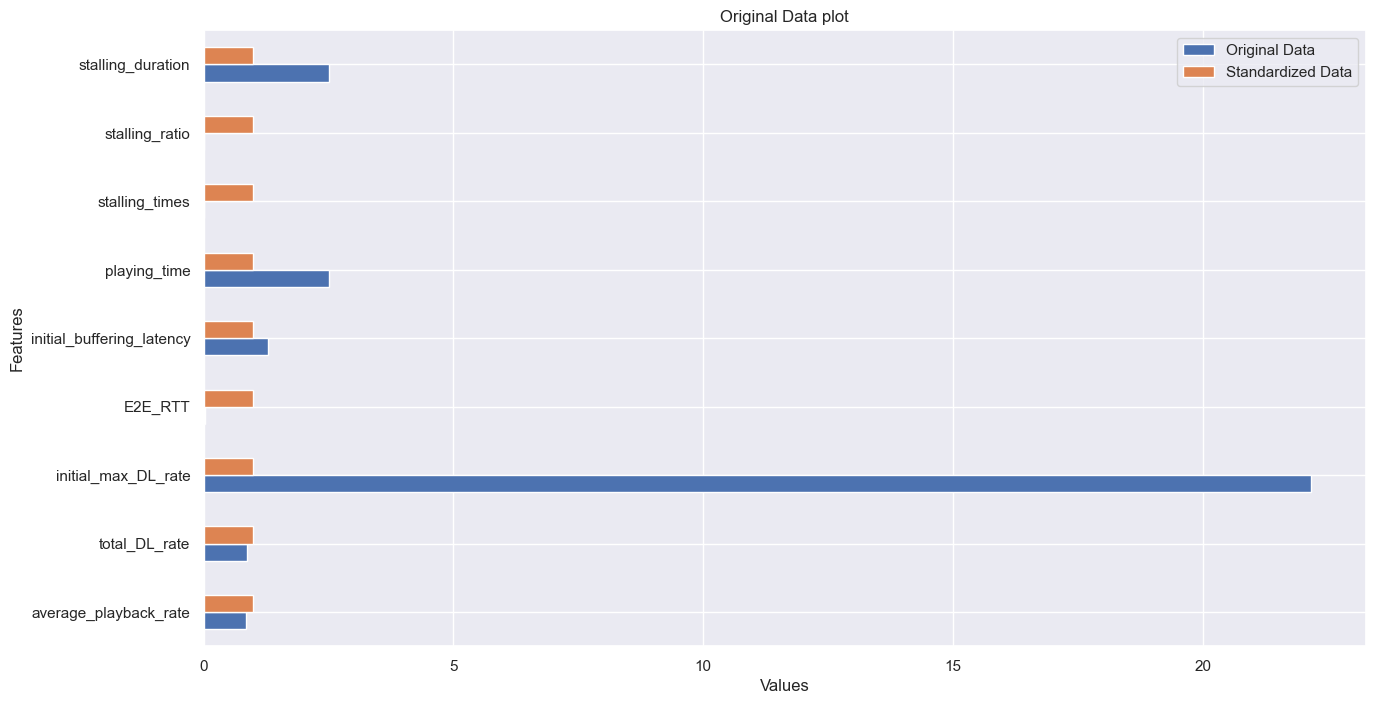

In [23]:
plotdata = pd.DataFrame({
    "Original Data":org_std_arr,
    "Standardized Data":std_arr},
    index=x)

plotdata.plot(kind="barh",figsize=(15, 8))
plt.title("Original Data plot")
plt.xlabel("Values")
plt.ylabel("Features")
plt.savefig("org_mean.png", bbox_inches='tight')
plt.show()

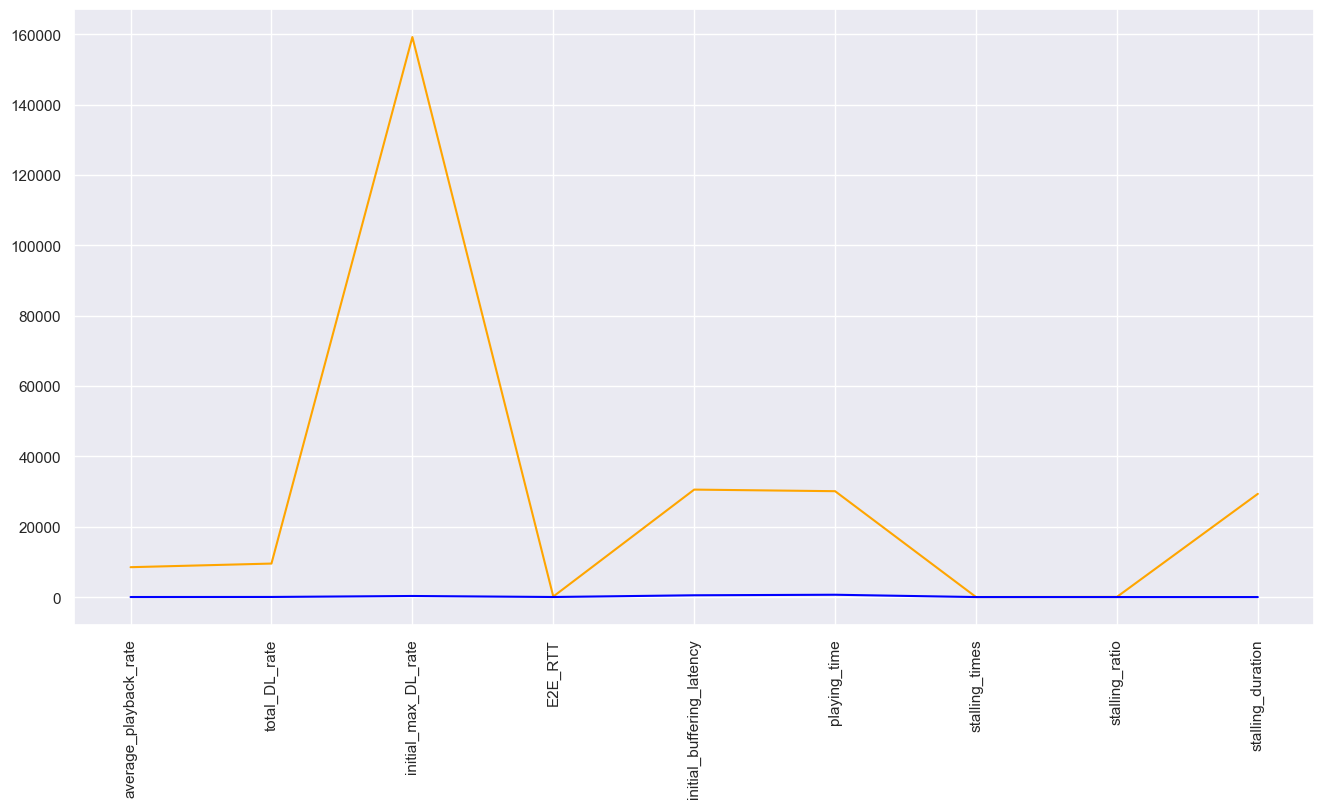

In [24]:
org_max_arr = []
org_min_arr = []
for column in standardized_data.columns:
    maxi = data_processed_zsc[column].max()
    mini = data_processed_zsc[column].min()
    org_max_arr.append(maxi)
    org_min_arr.append(mini)
    
x= np.array(standardized_data.columns.tolist())
plt.plot(x,org_max_arr, color ='orange')
plt.plot(x,org_min_arr, color = 'blue')
plt.xticks(rotation = 90)
plt.savefig("11.png", bbox_inches='tight')
plt.show()

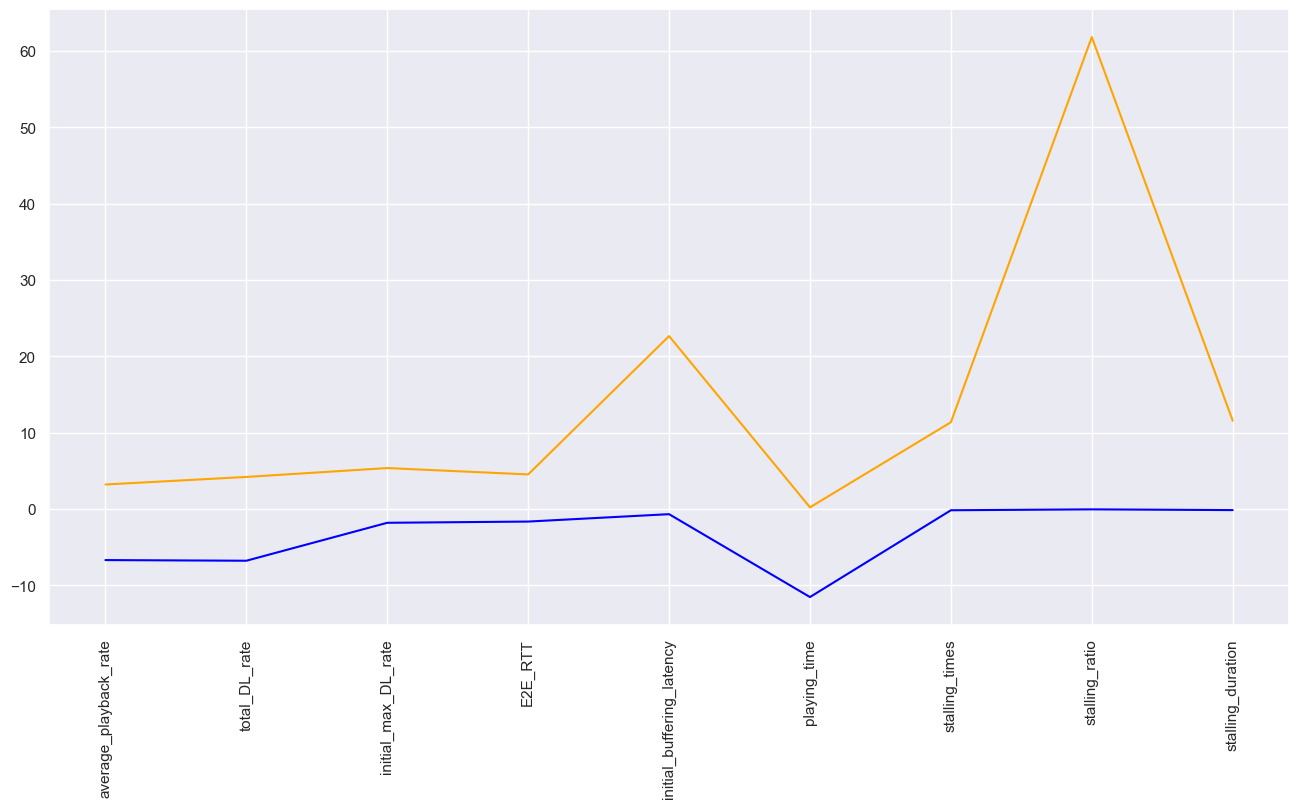

In [25]:
max_arr = []
min_arr=[]
for column in standardized_data.columns:
    maxi = standardized_data[column].max()
    mini= standardized_data[column].min()
    max_arr.append(maxi)
    min_arr.append(mini)
    
x= np.array(standardized_data.columns.tolist())
plt.plot(x,max_arr, color ='orange')
plt.plot(x,min_arr, color = 'blue')
plt.xticks(rotation = 90)
plt.savefig("22.png", bbox_inches='tight')
plt.show()

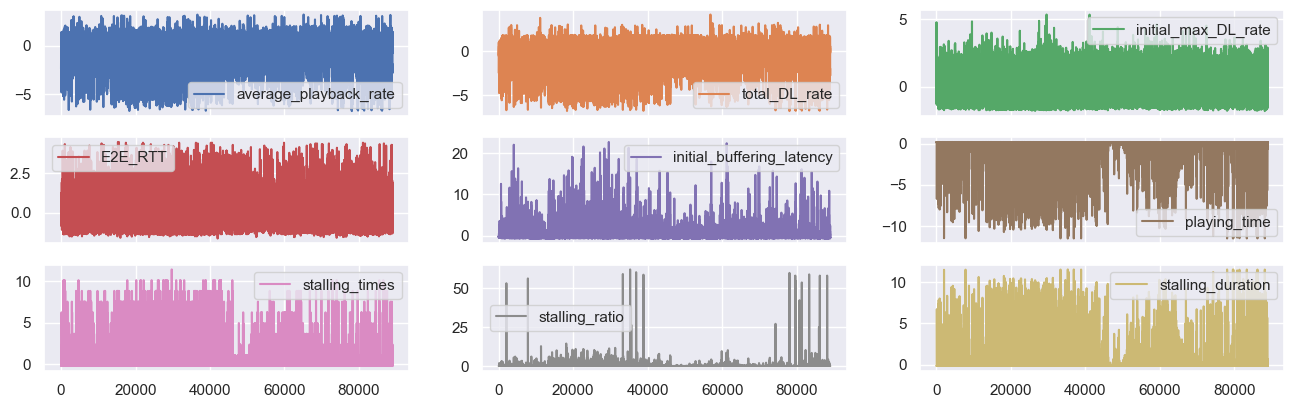

In [26]:
# Plotting the feature column
standardized_data.plot(subplots=True, layout=(5,3))
plt.savefig('standardized_plot.png')
plt.show()

# Principal Component Analysis

In [27]:
pc_names = ['PC'+str(i) for i in range(1,10)]

# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(standardized_data)
principal_components = pca.transform(standardized_data)
explained_variance_ratio = pca.explained_variance_ratio_
result_df = pd.DataFrame(principal_components, columns=pc_names)



target = pd.Series(y, name='VMOS')
result_df = pd.concat([result_df, target], axis=1)
result_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,VMOS
0,1.492094,0.631859,-1.303937,-0.763906,2.604140,0.434191,-0.018799,-0.219359,0.001364,3.96
1,-0.416631,0.186230,0.164461,-0.231276,0.204715,0.032084,-0.005482,-0.204124,-0.000259,3.96
2,-0.386762,0.317440,-0.034930,-0.110925,0.174212,0.044882,-0.012005,-0.124334,-0.000479,3.98
3,-0.541396,0.204638,0.431100,-0.410578,0.176393,0.055779,0.008887,-0.177315,-0.001117,3.96
4,-0.492677,0.243978,0.379233,-0.416119,0.211491,0.102400,0.019000,-0.189015,-0.000552,3.95
...,...,...,...,...,...,...,...,...,...,...
89019,0.021546,-0.021490,-0.728450,0.426184,0.279291,-0.088409,-0.072060,-0.028388,0.002404,3.95
89020,-0.591488,0.368025,-0.719647,0.824505,-0.587687,-0.143034,-0.067161,-0.030489,-0.001063,4.01
89021,-0.179491,0.579789,-0.397020,-0.081622,0.463986,0.038658,-0.042201,0.056875,0.000744,4.03
89022,-0.588282,0.842520,-0.703879,0.539483,-0.357508,-0.015729,-0.047737,0.080774,-0.001108,4.06


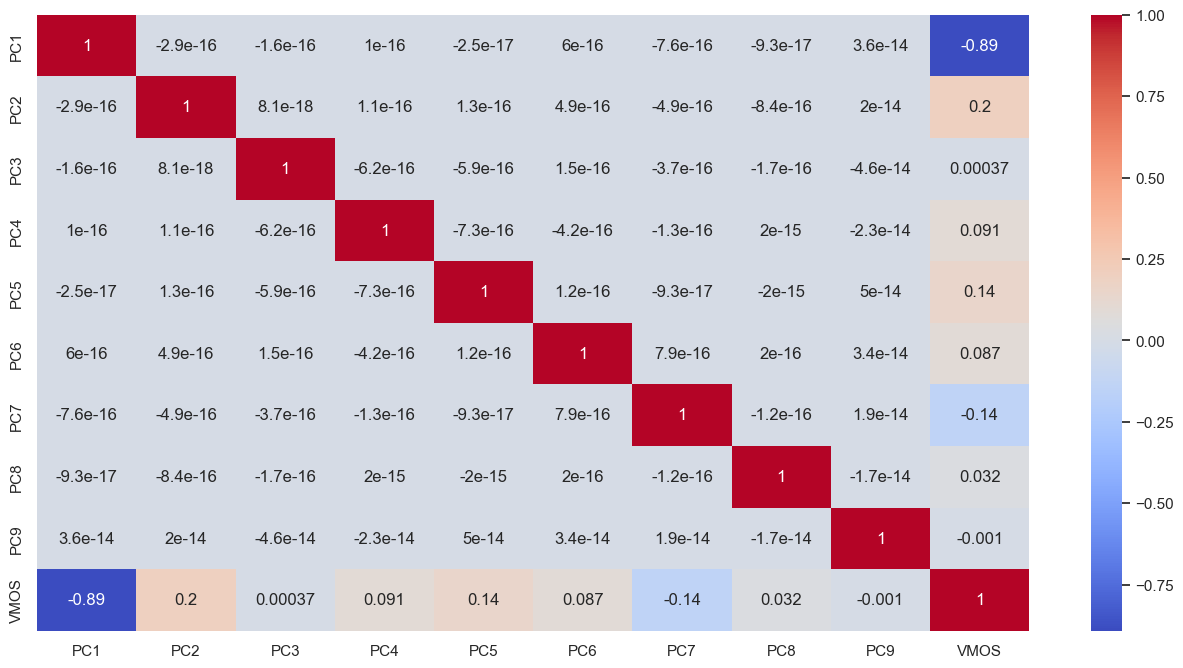

In [28]:
# Correlation Heatmap
import seaborn as sns

sns.set(rc = {'figure.figsize':(16,8)})
heatmap = sns.heatmap(result_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Save the heatmap as an image file
heatmap.figure.savefig('6.png')

In [29]:
explained_variance_ratio

array([5.68620171e-01, 1.39228849e-01, 1.00272381e-01, 8.40406572e-02,
       6.05502152e-02, 3.48431215e-02, 1.03952419e-02, 2.04872539e-03,
       6.37194513e-07])

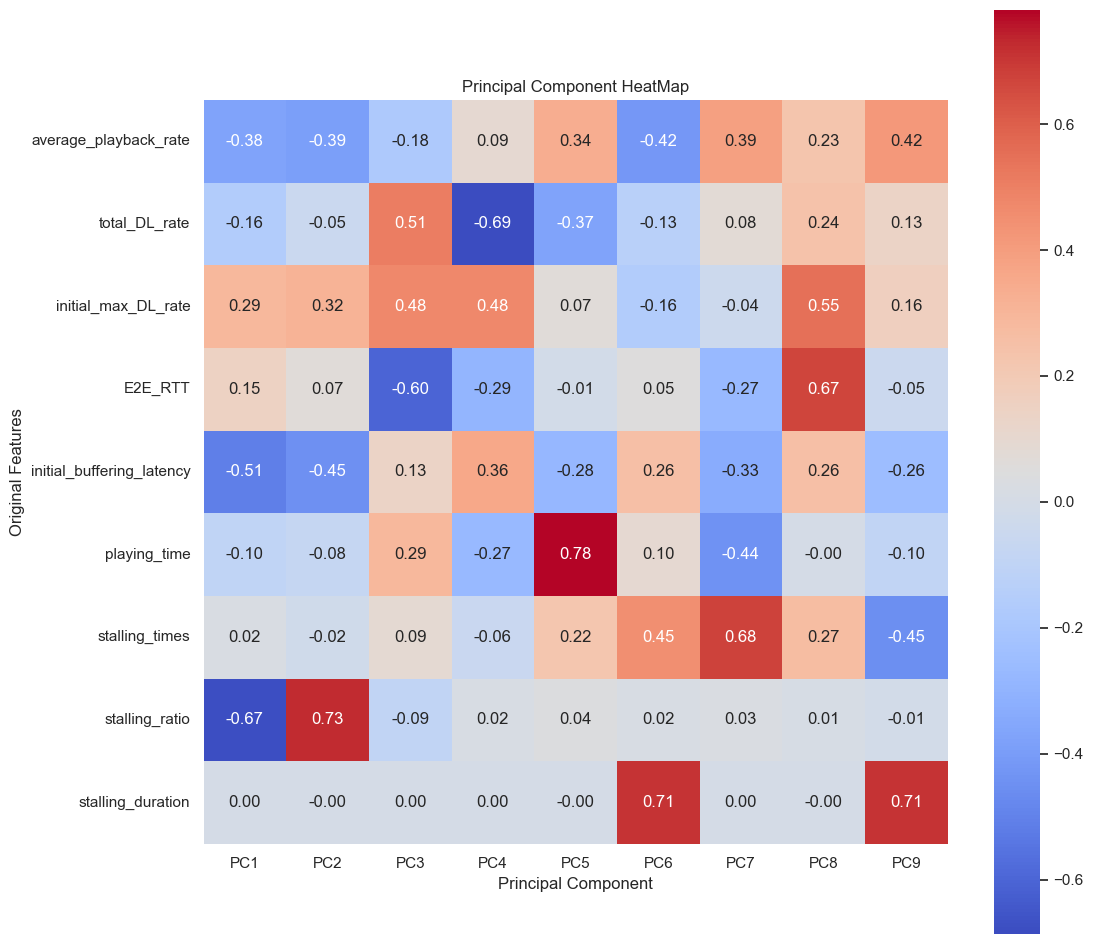

In [30]:
plt.figure(figsize=(12, 12))
sns.heatmap(pca.components_, cmap='coolwarm', square=True, annot=True, fmt='.2f', yticklabels=standardized_data.columns, xticklabels=pc_names)
plt.yticks(rotation = 0)
plt.xlabel('Principal Component')
plt.ylabel('Original Features')
plt.title('Principal Component HeatMap')
plt.show()

## Discretizing the Target Variable using three different strategies

In [31]:
y_2d = y.reshape(-1, 1)

In [32]:
from sklearn.preprocessing import KBinsDiscretizer

# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = trans.fit_transform(y_2d)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)
target_unf=dataset[0]
target_unf

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
89019    4.0
89020    4.0
89021    4.0
89022    4.0
89023    4.0
Name: 0, Length: 89024, dtype: float64

In [33]:
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(y_2d)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)
target_kmns=dataset[0]
target_kmns

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
89019    4.0
89020    4.0
89021    4.0
89022    4.0
89023    3.0
Name: 0, Length: 89024, dtype: float64

In [34]:
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data = trans.fit_transform(y_2d)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)
target_qnt=dataset[0]
target_qnt

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
89019    2.0
89020    3.0
89021    3.0
89022    4.0
89023    0.0
Name: 0, Length: 89024, dtype: float64

In [36]:
result_df["Target"] = target_unf
# Select specific columns to include in the Excel file
selected_columns = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'Target']

# Save selected columns to Excel file
result_df[selected_columns].to_excel('FinalDataset_unf.xlsx', index=False)

In [37]:
result_df["Target"] = target_kmns
# Select specific columns to include in the Excel file
selected_columns = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'Target']

# Save selected columns to Excel file
result_df[selected_columns].to_excel('FinalDataset_kmns.xlsx', index=False)

In [38]:
result_df["Target"] = target_qnt
# Select specific columns to include in the Excel file
selected_columns = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'Target']

# Save selected columns to Excel file
result_df[selected_columns].to_excel('FinalDataset_qnt.xlsx', index=False)